In [174]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [175]:
train_gen = ImageDataGenerator(rescale= 1./255,
                               shear_range = 0.4,
                               zoom_range = 0.4,
                               horizontal_flip = True,
                               vertical_flip = True)

In [176]:
test_gen = ImageDataGenerator(rescale= 1./255)

In [177]:
train_set = train_gen.flow_from_directory('/content/drive/MyDrive/Data_Science/CNN/CNN_Using_SVM/Datasets/train',
                                          class_mode='binary', target_size = (64,64), batch_size=32)

Found 96 images belonging to 2 classes.


In [178]:
test_set = train_gen.flow_from_directory('/content/drive/MyDrive/Data_Science/CNN/CNN_Using_SVM/Datasets/test',
                                          class_mode='binary', target_size = (64,64), batch_size=32)

Found 27 images belonging to 2 classes.


In [179]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

In [180]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size= 10, strides = 2, padding = 'same', activation = 'relu',input_shape = [64,64,3]))
model.add(MaxPool2D(pool_size =2, strides = 2))
model.add(Conv2D(filters = 16, kernel_size= 10, strides = 2, padding = 'same', activation = 'relu',input_shape = [64,64,3]))
model.add(MaxPool2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units = 128))
# This below line is for the Binary Classification
model.add(Dense(1, kernel_regularizer= l2(0.01), activation = 'linear'))
# For SVM we will use kernel_regularizer= l2(0.01), activation = 'linear'
# This below line is for the Multi class Classification we will use activation as 'softmax'

In [181]:
model.compile(optimizer = 'adam', loss= 'hinge', metrics=['accuracy']) 
# For the SVM loss we will use loss= 'squared_hinge' for multiclass and hinge for the binary classification

In [182]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 16)        4816      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          25616     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [183]:
model_fit = model.fit(x = train_set, validation_data = test_set, epochs= 50)

Epoch 1/50
3/3 [==============================] - 1s 312ms/step - loss: 1.0352 - accuracy: 0.5104 - val_loss: 0.9926 - val_accuracy: 0.4815
Epoch 2/50
3/3 [==============================] - 1s 195ms/step - loss: 1.0210 - accuracy: 0.5000 - val_loss: 1.0376 - val_accuracy: 0.4815
Epoch 3/50
3/3 [==============================] - 1s 194ms/step - loss: 1.0136 - accuracy: 0.5000 - val_loss: 0.9326 - val_accuracy: 0.7037
Epoch 4/50
3/3 [==============================] - 1s 201ms/step - loss: 1.0202 - accuracy: 0.5417 - val_loss: 0.9343 - val_accuracy: 0.5556
Epoch 5/50
3/3 [==============================] - 1s 196ms/step - loss: 0.9780 - accuracy: 0.5312 - val_loss: 0.9928 - val_accuracy: 0.5185
Epoch 6/50
3/3 [==============================] - 1s 201ms/step - loss: 0.9699 - accuracy: 0.5104 - val_loss: 0.9653 - val_accuracy: 0.4444
Epoch 7/50
3/3 [==============================] - 1s 200ms/step - loss: 0.9513 - accuracy: 0.5000 - val_loss: 0.9280 - val_accuracy: 0.5185
Epoch 8/50
3/3 [====

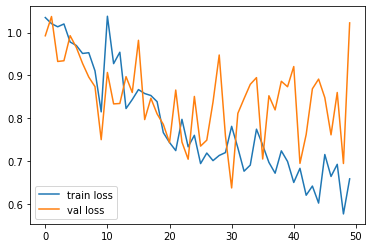

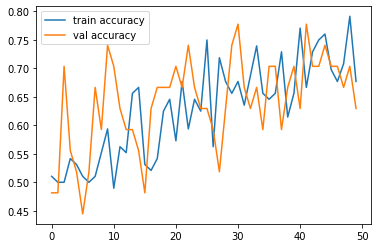

<Figure size 432x288 with 0 Axes>

In [184]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train accuracy')
plt.plot(model_fit.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuraacy')

In [185]:
from tensorflow.keras.models import load_model

model.save('CNN_with_SVM_Dog_Cat.h5')

In [186]:
model = load_model('CNN_with_SVM_Dog_Cat.h5')

In [187]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 32, 32, 16)        4816      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 16)          25616     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [188]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

test_img = load_img('/content/drive/MyDrive/Data_Science/CNN/CNN_Using_SVM/Datasets/val/Dog.PNG', color_mode = 'rgb', target_size=(64,64))
test_img = img_to_array(test_img)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [189]:
result = np.argmax(result)

In [190]:
result

0